## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [3]:
S0 = data.iloc[-1]
S0

MSFT    221.889999
Name: 2020-12-30 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [6]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Set the values on the first row of the price_list array equal to S0.

In [7]:
price_list[0] = S0
price_list

array([[221.88999939, 221.88999939, 221.88999939, ..., 221.88999939,
        221.88999939, 221.88999939],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [9]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
    
price_list

array([[221.88999939, 221.88999939, 221.88999939, ..., 221.88999939,
        221.88999939, 221.88999939],
       [219.61301006, 220.07185928, 221.37960806, ..., 220.86052653,
        225.56303675, 218.81486531],
       [221.51805955, 226.10012449, 228.98579701, ..., 222.50570487,
        222.67211428, 223.18887285],
       ...,
       [268.79405883, 242.85300623, 311.10440449, ..., 163.4017895 ,
        315.44380483, 317.60504994],
       [269.11731214, 238.60139454, 310.80208619, ..., 165.10647281,
        317.74304098, 315.05496592],
       [262.3704265 , 246.26470447, 318.58112608, ..., 167.23166799,
        321.48849039, 318.48448332]])

Finally, plot the obtained price list data.

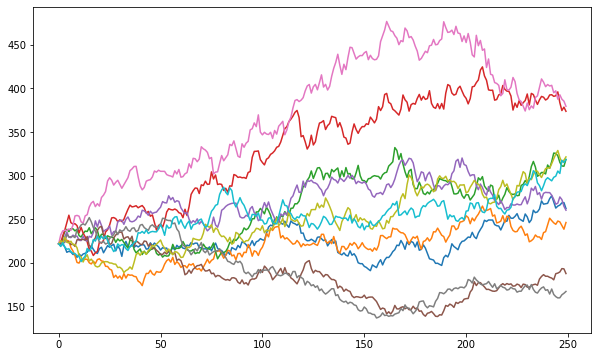

In [11]:
plt.figure(figsize=(10,6))
plt.plot(price_list);